# Final Project - The Rumos Bank Marketing Campaign


Depois do vosso sucesso no primeiro projecto no The Rumos Bank, surge um novo projecto ainda mais empolgante! 

A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [9]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, FeatureUnion, make_union
from sklearn.preprocessing import OneHotEncoder



seed = 42


In [10]:
df = pd.read_csv('bank_marketing_campaign.csv')
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.shape

(41188, 16)

In [12]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# 1. Quantas features estão disponíveis? Quantos clientes?
  - Exitem 16 features disponíveis no dataset 
  - Exitem 41188 clientes 

# 2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
Nota-se que dataset está desequilibrado visto que exitem  4640 clientes que efectivamente aderiram ao depósito a prazo e 36548
clientes que não aderiram ao depósito a prazo.

In [13]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = seed)

In [14]:
X_train = train_set.drop(['y'], axis = 'columns')
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

In [15]:
variaveis_cat = df.select_dtypes(include=np.object)
variaveis_cat

,job,marital,education,default,housing,loan,poutcome,y
0,housemaid,married,basic.4y,no,no,no,nonexistent,no
1,services,married,high.school,unknown,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no
3,admin.,married,basic.6y,no,no,no,nonexistent,no
4,services,married,high.school,no,no,yes,nonexistent,no
...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,nonexistent,no
41185,retired,married,university.degree,no,yes,no,nonexistent,no
41186,technician,married,professional.course,no,no,no,nonexistent,yes


In [16]:
df_dummies = pd.get_dummies(variaveis_cat)
df_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
41184,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1


In [17]:
df_dummies = df_dummies.drop(['y_yes'],axis = 1)

In [18]:
df_dummies = df_dummies.rename(columns={'y_no':'y'})

In [19]:
df = df.drop(variaveis_cat, axis = 1)

In [20]:
total_df = pd.concat([df,df_dummies],axis = 1)
total_df

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,57,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,37,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,1,0,0,0,1,0,1
3,40,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,1,0,0,0,1,0,1
4,56,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,1,1,0,0,0,1,0,0
41184,46,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,1,0,0,1,0,0,0,1,0,1
41185,56,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,0,0,1,1,0,0,0,1,0,1
41186,44,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,...,1,0,0,1,0,0,0,1,0,0


In [21]:
train_set, test_set = train_test_split(total_df, test_size = 0.2, random_state = seed)

In [22]:
X_train = train_set.drop(['y'], axis = 'columns')
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

In [23]:
scaler = MinMaxScaler()

features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

In [24]:
y_preds_all_bad = np.ones(y_test.shape) 

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 7303
Number of False Negatives: 0
Number of False Positives: 935


In [26]:
print('Total Cost:', fp*2000)


Total Cost: 1870000


In [27]:
accuracy_score(y_test, y_preds_all_bad)

0.8865015780529255

In [28]:
# para todos os bons candidatos o banco teria um custo de 1870000

In [29]:
y_preds_all_good = np.zeros(y_test.shape) 

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_good).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 935
Number of True Positives: 0
Number of False Negatives: 7303
Number of False Positives: 0


In [31]:
print('Total Cost:', fn*500)

Total Cost: 3651500


In [32]:
# para os clientes consideraddos como maus candidatos o banco teria um custo de  3651500

In [33]:
def total_cost(y_test, y_preds, threshold = 0.2):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*3000
    cost_fp = fp*1000
    
    return cost_fn + cost_fp

In [34]:
def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()

In [35]:
def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# LogisticRegression

In [36]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 27.6 s, sys: 585 ms, total: 28.2 s
Wall time: 14.3 s


In [37]:
clf_lr.score(X_test, y_test)

0.7671764991502792

In [38]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

In [39]:
total_cost(y_test, y_preds, threshold = 0.5)

5136000

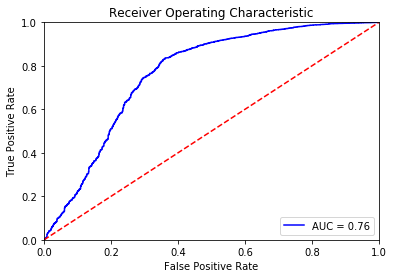

In [40]:
auc_roc_plot(y_test, y_preds)

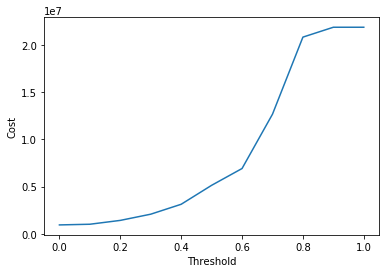

In [41]:
min_cost_threshold(y_test, y_preds)

In [42]:
total_cost(y_test, y_preds, threshold = 0.4)

3125000

# kNN

In [43]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 5min 31s, sys: 2.32 s, total: 5min 33s
Wall time: 5min 35s


In [44]:
y_preds = clf_knn.predict_proba(X_test)[:,1]

clf_knn.score(X_test, y_test)

0.8909929594561787

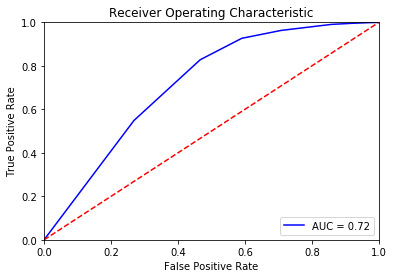

In [45]:
auc_roc_plot(y_test, y_preds)

In [72]:
total_cost(y_test, y_preds, threshold = 0.5)

1185000

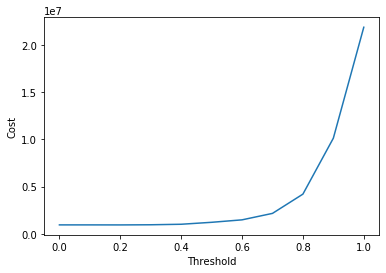

In [47]:
min_cost_threshold(y_test, y_preds)

In [80]:
total_cost(y_test, y_preds, threshold = 0.7)

1866000

# DecisionTree

In [49]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'max_depth':[3, 6], 'min_samples_split': [2, 4, 10]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 2.24 s, sys: 93.4 ms, total: 2.34 s
Wall time: 2.35 s


In [50]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [51]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.8383102694828842

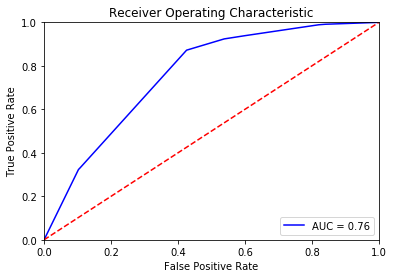

In [52]:
auc_roc_plot(y_test, y_preds)

In [70]:
total_cost(y_test, y_preds, threshold = 0.5)

1185000

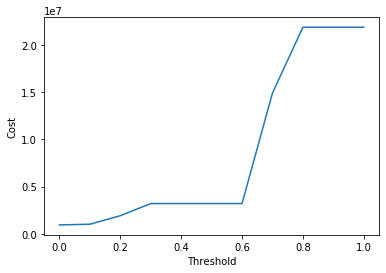

In [54]:
min_cost_threshold(y_test, y_preds)

In [71]:

total_cost(y_test, y_preds, threshold = 0.1)

933000

# RandomForest

In [56]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 4min 22s, sys: 8.25 s, total: 4min 31s
Wall time: 4min 33s


In [57]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.8776402039329935

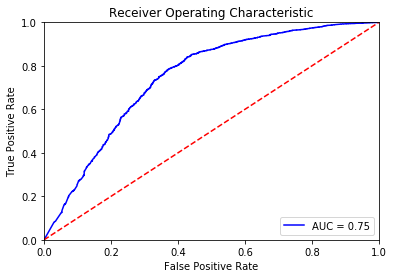

In [58]:
auc_roc_plot(y_test, y_preds)

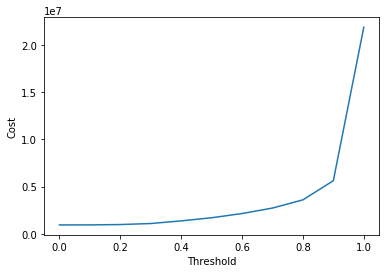

In [59]:
min_cost_threshold(y_test, y_preds)

In [76]:
total_cost(y_test, y_preds, threshold = 0.6)

1435000

In [61]:
X_train.shape

(32950, 44)

# Neural Networks

In [62]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 1000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_mlp = GridSearchCV(mlp, parameters, cv = 5).fit(X_train, y_train)

CPU times: user 23min 42s, sys: 30 s, total: 24min 12s
Wall time: 12min 26s


In [63]:
clf_mlp.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.0001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [64]:
clf_mlp.best_score_

0.8928983308042489

In [65]:
y_preds = clf_mlp.predict_proba(X_test)[:,1]

clf_mlp.score(X_test, y_test)



0.8942704539936878

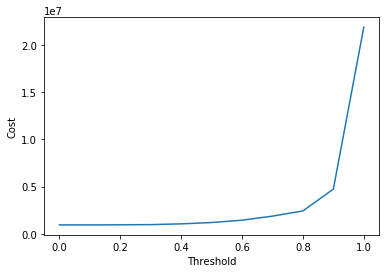

In [66]:
min_cost_threshold(y_test, y_preds)

In [67]:
total_cost(y_test, y_preds, threshold = 0.8)

2418000

# SVM

O modelo SVM demorou muito tempo para correr portanto não foi possivel utilizar neste projeto.

# 3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?

In [82]:
rf = RandomForestClassifier(**clf_rf.best_params_).fit(X_train, y_train)

In [ ]:
important_features = pd.DataFrame(data = rf.feature_importances_, index = X_train.columns, columns = ['value'])
important_features.sort_values(by = 'value', ascending = False)

As variaveis que mais contribuem para o modelo decidir se um cliente vai ser um bom ou mau pagador são: AGE - idade do cliente, e euribor3m.

# 4. Qual o algoritmo que levou aos melhores resultados?



O Modelo que levou a melhores resultados foram as decision tree e as random forests - 1435000 de custo.
Visto que com as decision tree não consigo saber qual a importancia das features, 
vou eleger o modelo de random forests como a solução final.

# 5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?



In [ ]:
A métrica usada foi o custo total uma vez que o objetivo do modelo era diminuir os custos do banco. 

# 6. Qual é o custo que o banco tem sem nenhum modelo?



O custo que o banco teria sem modelo, ou seja, assumindo que todos os clientes seriam maus candidatus, é de: 3651500 Euros.

# 7. Qual o custo que o banco passa a ter com o vosso modelo?



O custo que o banco teria com o modelo seria de: 1435000 Euros - Pouparia mais de 1 Milhão  Euros!